In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

## Библиотеки

In [3]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold,
                                     StratifiedShuffleSplit, RepeatedStratifiedKFold, validation_curve, cross_validate)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, make_scorer, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay,
                             ConfusionMatrixDisplay, balanced_accuracy_score, average_precision_score,
                             mean_absolute_percentage_error)
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTEENN
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from collections import Counter
from sklearn.cluster import KMeans
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, average_precision_score
from sklearn.impute import SimpleImputer, IterativeImputer
import matplotlib.colors as mcolors
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn import svm
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)  # Отображать все колонки

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform  # Для генерации случайных чисел в диапазоне


## EDA

In [6]:
# Цель - наилучшим способом предсказать цену брильянта.
# price: цена в usd
# carat: вeс в каратах
# cut: качество огранки (Fair, Good, Very Good, Premium, Ideal)
# color: цветность брильянта (степень "желтезны"), от J (плохая) до D (наилучшая) https://en.wikipedia.org/wiki/Diamond_color
# clarity: чистота брильянта (I1 (плохая), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (наилучшая)) https://en.wikipedia.org/wiki/Diamond_clarity
# x: длинна в мм
# y: ширина в мм
# z: глубина в мм
# depth: общий процент глубины = z / mean(x, y) = 2 * z / (x + y)
# table: ширина вершины ромба относительно самого широкого места

In [7]:
path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [8]:
df = pd.read_csv(path_train)

In [9]:
df.duplicated().sum() # Колво дубликатов
df = df.drop_duplicates()

In [10]:
df.head(3)

carat      cut color clarity  depth  table  price     x     y     z
0   0.55    Ideal     I     SI1   61.7   55.0   1134  5.29  5.31  3.27
1   0.94  Premium     E     SI1   62.4   56.0   4580  6.27  6.24  3.90
2   0.33  Premium     E     SI2   60.0   59.0    594  4.49  4.47  2.69

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40377 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40377 non-null  float64
 1   cut      40377 non-null  object 
 2   color    40377 non-null  object 
 3   clarity  40377 non-null  object 
 4   depth    40377 non-null  float64
 5   table    40377 non-null  float64
 6   price    40377 non-null  int64  
 7   x        40377 non-null  float64
 8   y        40377 non-null  float64
 9   z        40377 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [12]:
df.describe()
# Цена 326 долларов всего?
# x y z нули? 
# max y мб большой

carat         depth         table         price             x  \
count  40377.00000  40377.000000  40377.000000  40377.000000  40377.000000   
mean       0.79713     61.745600     57.452126   3938.759690      5.728777   
std        0.47404      1.420043      2.231121   3998.041468      1.122689   
min        0.20000     43.000000     43.000000    326.000000      0.000000   
25%        0.40000     61.000000     56.000000    946.000000      4.710000   
50%        0.70000     61.800000     57.000000   2401.000000      5.690000   
75%        1.04000     62.500000     59.000000   5326.000000      6.540000   
max        5.01000     78.200000     95.000000  18818.000000     10.740000   

                  y             z  
count  40377.000000  40377.000000  
mean       5.732886      3.537583  
std        1.152500      0.709028  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.530000      4.030000  
max       58.900000     31.800000

In [13]:
def classify_columns(df):
    numeric_columns = []
    categorical_columns = []

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            numeric_columns.append(column)
        else:
            categorical_columns.append(column)

    return numeric_columns, categorical_columns

numeric_columns, categorical_columns = classify_columns(df)

print("Числовые колонки:", numeric_columns)
print("Категориальные колонки:", categorical_columns)

Числовые колонки: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Категориальные колонки: ['cut', 'color', 'clarity']


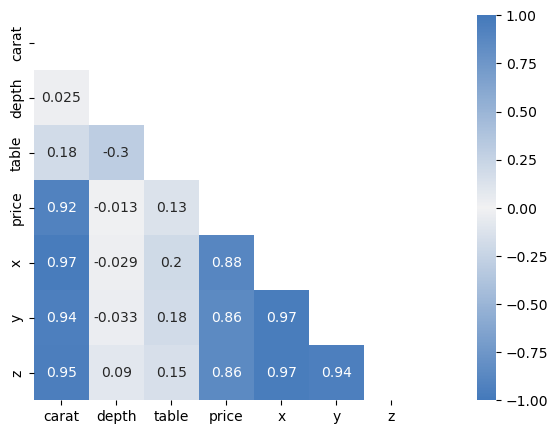

In [14]:
corr = df.drop(['cut', 'color', 'clarity'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(corr,
    mask=mask,
    cmap=sns.diverging_palette(250, 250, as_cmap=True),
    annot = True,
    vmin=-1.0, vmax=1.0, # всегда ставить от -1 до 1 ставим два одинаковых цвета на оба конца
    square=True,
    ax=ax);

In [15]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
print(missing_summary)

Размерность датафрейма:
(40377, 10)

Сводка по отсутствующим значениям и уникальным значениям:
         Missing Values Count  Missing Values Percentage  Unique Values Count
carat                       0                        0.0                  269
cut                         0                        0.0                    5
color                       0                        0.0                    7
clarity                     0                        0.0                    8
depth                       0                        0.0                  172
table                       0                        0.0                  119
price                       0                        0.0                10397
x                           0                        0.0                  546
y                           0                        0.0                  540
z                           0                        0.0                  369


In [16]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []

In [17]:
# Выводим список колонок и их количество в красивом формате
print(f"Список колонок:\n{list(df.columns)}")
print(f"\nОбщее количество колонок: {len(df.columns)}")


Список колонок:
['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

Общее количество колонок: 10


**ЗАМЕНИТЬ НА NULL - ПРАВИЛА ОБРАБОТКИ ТЕСТОВОГО И ТРЕН ДАТАСЕТА НЕ ДОЛЖНЫ ОТЛИЧАТЬСЯ \
Нужно будет явно заменить на null в тестовом датасете**

In [19]:
# df.loc[(((df['x'] <= 0) | (df['y'] <= 0)) | (df['z'] <= 0))]
len(df[(df.x == 0) | (df.y == 0) | (df.z == 0)])

13

In [20]:
len(df.loc[(((df['x'] <= 0) | (df['y'] <= 0)) | (df['z'] <= 0))])

13

In [21]:
df.shape

(40377, 10)

In [22]:
df.loc[df['x'] <= 0, 'x'] = np.nan
df.loc[df['y'] <= 0, 'y'] = np.nan
df.loc[df['z'] <= 0, 'z'] = np.nan

In [23]:
df.shape

(40377, 10)

In [24]:
df[df.isnull().any(axis=1)]

carat        cut color clarity  depth  table  price     x     y   z
4817    1.07      Ideal     F     SI2   61.6   56.0   4954   NaN  6.62 NaN
7928    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47 NaN
10418   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95 NaN
11203   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42 NaN
13661   1.14       Fair     G     VS1   57.5   67.0   6381   NaN   NaN NaN
15977   0.71       Good     F     SI2   64.1   60.0   2130   NaN   NaN NaN
18359   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83 NaN
23017   1.20    Premium     D    VVS1   62.1   59.0  15686   NaN   NaN NaN
25662   1.56      Ideal     G     VS2   62.2   54.0  12800   NaN   NaN NaN
32084   2.25    Premium     H     SI2   62.8   59.0  18034   NaN   NaN NaN
33954   1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48 NaN
35064   1.00  Very Good     H     VS2   63.3   53.0   5139   NaN   NaN NaN
36549   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67 NaN

**Видим что есть строки где все три значения np.nan \
Потом в будущем заменим три измерения объемом, частично избавимся от мультиколлинеарности**

In [26]:
df.describe()

carat         depth         table         price             x  \
count  40377.00000  40377.000000  40377.000000  40377.000000  40370.000000   
mean       0.79713     61.745600     57.452126   3938.759690      5.729770   
std        0.47404      1.420043      2.231121   3998.041468      1.120248   
min        0.20000     43.000000     43.000000    326.000000      3.730000   
25%        0.40000     61.000000     56.000000    946.000000      4.710000   
50%        0.70000     61.800000     57.000000   2401.000000      5.690000   
75%        1.04000     62.500000     59.000000   5326.000000      6.540000   
max        5.01000     78.200000     95.000000  18818.000000     10.740000   

                  y             z  
count  40371.000000  40364.000000  
mean       5.733738      3.538722  
std        1.150464      0.706293  
min        3.710000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.530000      4.030000  
max       58.900000     31.800000

In [27]:
# Прежде чем это сделать надо убрать ошибки в x y z

# df['xyz'] = df['x']*df['y']*df['z']
# df.drop(columns=['x','y','z'], axis=1, inplace=True)

In [28]:
# df[df['carat'] == 5.01000]

In [29]:
# sns.pairplot(df)

**Видим мультимодальные и не нормальные распределения - буду менять у X в будущем, мб логарифмировать \
Видим некоторые выбросы
нелинейный рост цены относительно размеров бриллианта - объясняется тем что какой нибудь 1 карат в серьге выглядит намного круче чем полкарата, поэтому и цена отличается больше чем в 2 раза**

***Попытаться рассмотреть все распределения с выбросами подробнее, разработать алгоритмические правила обработки нетривиальных случаев***

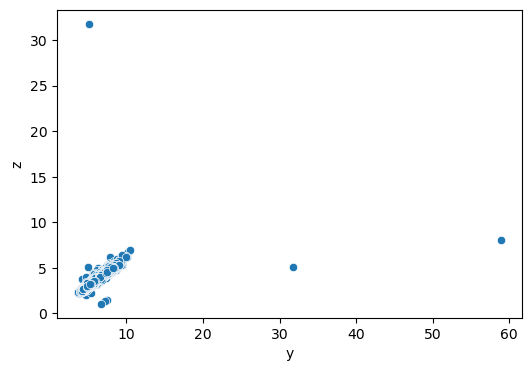

In [32]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='y', y='z', data=df)
plt.show()

In [33]:
df[(df['y'] > 25)] 

carat      cut color clarity  depth  table  price     x     y     z
2455    0.51    Ideal     E     VS1   61.8   55.0   2075  5.15  31.8  5.12
16230   2.00  Premium     H     SI2   58.9   57.0  12210  8.09  58.9  8.06

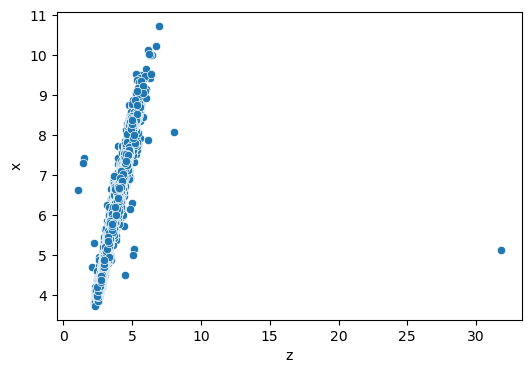

In [34]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='z', y='x', data=df)
plt.show()

In [35]:
df[(df['z'] > 30)] 

carat        cut color clarity  depth  table  price     x     y     z
1895   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12  5.15  31.8

In [36]:
# df[(df['z'] >= 0.75 * (df['x'] + df['y']) / 2)]

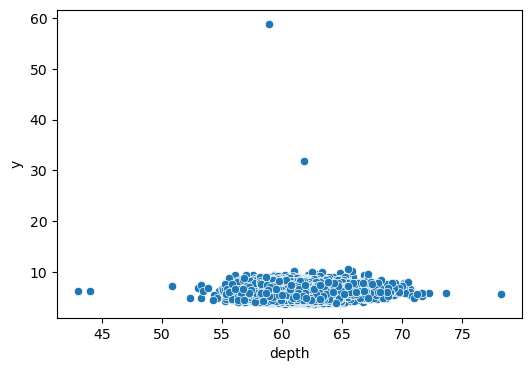

In [37]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='depth', y='y', data=df)
plt.show()

In [38]:
# df[(df['y'] > 25)] 
# те же строки
# df[(df['y'] < 9) & (df['depth'] < 45)] 
# df[(df['y'] < 9) & (df['depth'] > 75)] 

In [39]:
# Косяк расчета depth для 3к строк? 
depth_percentage = round(2 * df['z'] / (df['x'] + df['y']) * 100, 1)
df[depth_percentage != df['depth']]

# Учесть проблему чисел с правающей точкой
# Учесть что у нас некоторые размеры абсурдны
# Использовать логику расчета глубины для восстановления значений x y z !!!

carat        cut color clarity  depth  table  price     x     y     z
16      0.52  Very Good     F    VVS2   61.5   57.0   2079  5.18  5.22  3.19
50      1.12  Very Good     G     SI2   63.4   57.0   3700  6.51  6.47  4.12
58      0.51      Ideal     E    VVS1   61.1   54.7   2691  5.16  5.20  3.17
95      1.00    Premium     F     VS1   61.3   59.0   6692  6.45  6.42  3.95
145     0.74      Ideal     I     SI1   61.3   56.0   2769  5.82  5.86  3.57
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
40339   0.70    Premium     F     SI2   62.9   57.0   2184  5.64  5.61  3.53
40353   1.11       Good     D     VS2   63.2   57.0   7863  6.61  6.64  4.18
40381   0.61      Ideal     J     VS2   59.7   59.0   1233  5.54  5.47  3.29
40425   2.01       Good     I     SI2   63.8   57.0   8780  8.00  7.95  5.10
40436   0.31      Ideal     G      IF   61.7   55.0    871  4.37  4.39  2.70

[2836 rows x 10 columns]

In [40]:
df['calculated_depth'] = round(2 * df['z'] / (df['x'] + df['y']) * 100, 1)
df_mismatch = df[df['calculated_depth'] != df['depth']].copy()
df_mismatch['delta'] = df_mismatch['calculated_depth'] - df_mismatch['depth']
df.drop('calculated_depth', axis=1, inplace=True)


In [41]:
# df_mismatch[abs(df_mismatch['delta']) > 1]

In [42]:
# round(df_mismatch['delta'], 1).nunique()

In [43]:
# df_mismatch[round(df_mismatch['delta']).abs() > 1]

**Сначала исправим обсурдные значения, затем исправим расчет глубины**

In [45]:
df.loc[df['x'] > 20, 'x'] /= 10
df.loc[df['y'] > 20, 'y'] /= 10
df.loc[df['z'] > 20, 'z'] /= 10

In [46]:
# sns.pairplot(df)

In [47]:
# df.loc[df[['x', 'y', 'z']].notna().all(axis=1), 'depth'] = round(2 * df['z'] / (df['x'] + df['y']) * 100, 1)

In [48]:
# df[df.isna().any(axis=1)]

In [49]:
# sns.pairplot(df)

**распределение целевой переменной имеет не нормальную форму**

## Кастомная Метрика

In [52]:
def irq_mse(y_true, y_pred):
    delta = y_pred - y_true
    quant_75 = np.quantile(delta, 0.75)
    quant_25 = np.quantile(delta, 0.25)
    irq = quant_75 - quant_25
    mask = (delta < quant_25 - 1.5*irq) | (delta > quant_75 + 1.5*irq)
    
    if mask.sum() == 0:
        irq_mse = 0
    else:
        delta_new = delta[mask]**2
        irq_mse = -1/len(delta_new) * np.sum(delta_new)
    return irq_mse


In [53]:
score_irq_mse = make_scorer(irq_mse)
score_irq_mse

make_scorer(irq_mse, response_method='predict')

## Биннинг

In [55]:
# from sklearn.preprocessing import KBinsDiscretizer

# binning = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='quantile')
# df['carat_binned'] = binning.fit_transform(df[['carat']])
# df['depth_binned'] = binning.fit_transform(df[['depth']])
# df['table_binned'] = binning.fit_transform(df[['table']])


In [56]:
# df = df.drop(['carat', 'depth', 'table'], axis=1).copy()

## Сплит + трансформеры

In [58]:
def classify_columns(df):
    numeric_columns = []
    categorical_columns = []

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            numeric_columns.append(column)
        else:
            categorical_columns.append(column)

    return numeric_columns, categorical_columns

numeric_columns, categorical_columns = classify_columns(df)

print("Числовые колонки:", numeric_columns)
print("Категориальные колонки:", categorical_columns)

Числовые колонки: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Категориальные колонки: ['cut', 'color', 'clarity']


In [59]:
X = df.drop('price', axis=1)
y = df['price']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [61]:
cat_features = ['cut', 'color', 'clarity']
# axis_features = ['depth', 'table']
axis_features = ['x', 'y', 'z']
num_features = ['carat', 'depth', 'table']
# num_features = ['carat', 'volume']

In [62]:
axis_transformer = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
    ('polynom', PolynomialFeatures(2, include_bias=False)),  # Поставить True, если модель не имеет свободного члена
    ('scaler', RobustScaler())  # Это место будет заменяться скейлерами через GridSearchCV
])

# Пайплайн для числовых признаков
num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
    ('scaler', RobustScaler())  # Здесь также заменяется скейлер
])

# Пайплайн для категориальных признаков
cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение пропусков наиболее частым значением
    ('onehot', OneHotEncoder(sparse_output=False))  # Кодирование категориальных переменных
])

# Объединение всех трансформеров в ColumnTransformer
CT = ColumnTransformer([
    ("axis_transformer", axis_transformer, axis_features),
    ("num", num, num_features),
    ("cat", cat, cat_features)
]).set_output(transform='pandas')

# Вывод информации о ColumnTransformer
display(CT)

ct = CT.fit_transform(X_train)

ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20)),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', RobustScaler())]),
                                 ['x', 'y', 'z']),
                                ('num',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20)),
                                                 ('scaler', RobustScaler())]),
                                 ['carat', 'depth', 'table']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['cut', 'color', 'clarity'])])

In [63]:
# axis_transformer = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('polynom', PolynomialFeatures(2, include_bias=False)),  # Поставить True, если модель не имеет свободного члена
#     ('scaler', RobustScaler())  # Это место будет заменяться скейлерами через GridSearchCV
# ])

# # Маппинг для cut, color и clarity
# cut_map = [{
#     'col': 'cut',
#     'mapping': {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
# }]

# color_map = [{
#     'col': 'color',
#     'mapping': {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
# }]

# clarity_map = [{
#     'col': 'clarity',
#     'mapping': {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
# }]

# # Трансформеры для cut, color и clarity
# cut_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('ce', ce.OrdinalEncoder(mapping=cut_map))
#     # ('scaler', MinMaxScaler())
# ])

# color_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('ce', ce.OrdinalEncoder(mapping=color_map))
#     # ('scaler', MinMaxScaler())
# ])

# clarity_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('ce', ce.OrdinalEncoder(mapping=clarity_map))
#     # ('scaler', MinMaxScaler())
# ])

# # Пайплайн для числовых признаков
# num = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('scaler', RobustScaler())  # Здесь также заменяется скейлер
# ])

# # Объединение всех трансформеров в ColumnTransformer
# CT = ColumnTransformer([
#     ("axis_transformer", axis_transformer, axis_features),
#     ("num", num, num_features),
#     ("cut_map", cut_transformer, ['cut']),
#     ("color_map", color_transformer, ['color']),
#     ("clarity_map", clarity_transformer, ['clarity'])
# ]).set_output(transform='pandas')

# # Вывод информации о ColumnTransformer
# display(CT)

# # Применение трансформеров
# ct = CT.fit_transform(X_train)



In [64]:
# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', Ridge())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

## Затестим пачку моделей

**После более менее выстроенного пайплайна (который потом будет доработан кросс валидацией) начнем тестить разные модели что б выделить хоть парочку лидеров**

In [67]:
from sklearn.svm import SVR  # Support Vector Machine для регрессии
from sklearn.linear_model import LassoCV  # Lasso регрессия с кросс-валидацией
from sklearn.neighbors import KNeighborsRegressor  # К ближайших соседей для регрессии
from sklearn.linear_model import LarsCV  # Ларс (Least Angle Regression)
from sklearn.linear_model import RANSACRegressor  # RANSAC регрессор
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent для регрессии
from sklearn.linear_model import LassoLarsCV  # Lasso с LARS и кросс-валидацией
from sklearn.linear_model import OrthogonalMatchingPursuitCV  # Orthogonal Matching Pursuit с кросс-валидацией
from sklearn.linear_model import RidgeCV  # Ridge регрессия с кросс-валидацией
from sklearn.linear_model import HuberRegressor  # Huber регрессор
from sklearn.linear_model import TheilSenRegressor  # Theil-Sen регрессор
from sklearn.linear_model import PassiveAggressiveRegressor  # Passive-Aggressive регрессор



In [68]:
# ультрахорош

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', SVR())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [69]:
# плохо

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', LassoCV())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [70]:
# Плохо но надо настраивать гиперпараметры

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', KNeighborsRegressor())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [71]:
# Ультраплохо делаю что то не так максимально
# ахахах -160 млн...

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', LarsCV())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [72]:
# наравне с ридж изначальной - 3,3 млн

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', RANSACRegressor())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [73]:

# Плохо но надо настраивать гиперпараметры

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', SGDRegressor())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [74]:
# намного лучше чем лассо и ларс по отдельности
# но все равно плохо 3,4 млн

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', LassoLarsCV())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [75]:
# Очень плохо -10млн

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', OrthogonalMatchingPursuitCV())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [76]:
# Чуть лучше нежели обычная Ridge

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', RidgeCV())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [77]:
# Тоже не лучше чем ридж обычная

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', HuberRegressor(max_iter=100000))
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [78]:
# тоже плохо плохо

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', TheilSenRegressor(max_iter=100000))
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [79]:
# тоже слишком плохо...

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', PassiveAggressiveRegressor())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

## Попробуем хорошо затюнить SVC

In [81]:
cat_features = ['cut', 'color', 'clarity']
axis_features = ['x', 'y', 'z', 'carat']
num_features = ['depth', 'table']

In [82]:
axis_transformer = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
    ('polynom', PolynomialFeatures(2, include_bias=False)),  # Поставить True, если модель не имеет свободного члена
    ('scaler', RobustScaler())  # Это место будет заменяться скейлерами через GridSearchCV
])

# Пайплайн для числовых признаков
num = Pipeline(steps=[
    ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
    ('scaler', RobustScaler())  # Здесь также заменяется скейлер
])

# Пайплайн для категориальных признаков
cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение пропусков наиболее частым значением
    ('onehot', OneHotEncoder(sparse_output=False))  # Кодирование категориальных переменных
])

# Объединение всех трансформеров в ColumnTransformer
CT = ColumnTransformer([
    ("axis_transformer", axis_transformer, axis_features),
    ("num", num, num_features),
    ("cat", cat, cat_features)
]).set_output(transform='pandas')
display(CT)


ColumnTransformer(transformers=[('axis_transformer',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20)),
                                                 ('polynom',
                                                  PolynomialFeatures(include_bias=False)),
                                                 ('scaler', RobustScaler())]),
                                 ['x', 'y', 'z', 'carat']),
                                ('num',
                                 Pipeline(steps=[('missing_num',
                                                  IterativeImputer(max_iter=20)),
                                                 ('scaler', RobustScaler())]),
                                 ['depth', 'table']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['cut', 'color', 'clarity'])])

In [83]:
model_target =  TransformedTargetRegressor(
                regressor = Pipeline(steps=[
                                ('preproc', CT),
                                ('estimator', SVR())
                            ]),
                # transformer = QuantileTransformer()
                transformer = PowerTransformer(method='yeo-johnson')
                # transformer =  PowerTransformer(method='box-cox')               
)
# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [84]:
param_grid = {
    # Параметры для axis_transformer
    'regressor__preproc__axis_transformer__polynom__degree': [2],
    'regressor__preproc__axis_transformer__scaler': [RobustScaler()],#, StandardScaler(), MinMaxScaler()],
    
    # Параметры для числовых признаков
    'regressor__preproc__num__scaler': [RobustScaler()],#, StandardScaler(), MinMaxScaler()],
   
    # Параметры для SVR (основной модели)
    # 'regressor__estimator__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'regressor__estimator__C': [10, 100, 1000]#10, 100, 1000],
    # 'regressor__estimator__gamma': ['scale', 'auto'],
    
    # Параметры для трансформера целевой переменной
    # 'transformer': [PowerTransformer(method='yeo-johnson'), PowerTransformer(method='box-cox')]
}

# Определение RandomizedSearchCV
grid = GridSearchCV(
    estimator=model_target,
    param_grid=param_grid, 
    cv=5,                            
    scoring=score_irq_mse, 
    n_jobs=-1
)

# Запуск случайного поиска
grid.fit(X_train, y_train)

print("Средняя правильность для наилучшей модели кроссвалидации на \
                валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_)  # вывод лучших результатов
display(gridresults.sort_values(["rank_test_score"]).T)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Средняя правильность для наилучшей модели кроссвалидации на                 валидационных тестовых наборах: -2094207.847316

Правильность для наилучшей модели на тестовом наборе: -2051850.111544



0  \
mean_fit_time                                                                               83.821355   
std_fit_time                                                                                 1.254397   
mean_score_time                                                                             38.612183   
std_score_time                                                                              27.095732   
param_regressor__estimator__C                                                                      10   
param_regressor__preproc__axis_transformer__pol...                                                  2   
param_regressor__preproc__axis_transformer__scaler                                     RobustScaler()   
param_regressor__preproc__num__scaler                                                  RobustScaler()   
params                                              {'regressor__estimator__C': 10, 'regressor__pr...   
split0_test_score                                                                     -2220496.140707   
split1_test_score                                                                     -2219159.717669   
split2_test_score                                                                     -2001136.673692   
split3_test_score                                                                     -2094421.174844   
split4_test_score                                                                     -1935825.529669   
mean_test_score                                                                       -2094207.847316   
std_test_score                                                                          114288.188684   
rank_test_score                                                                                     1   

                                                                                                    1  \
mean_fit_time                                                                              789.542212   
std_fit_time                                                                                 32.49915   
mean_score_time                                                                             26.780196   
std_score_time                                                                              27.259598   
param_regressor__estimator__C                                                                     100   
param_regressor__preproc__axis_transformer__pol...                                                  2   
param_regressor__preproc__axis_transformer__scaler                                     RobustScaler()   
param_regressor__preproc__num__scaler                                                  RobustScaler()   
params                                              {'regressor__estimator__C': 100, 'regressor__p...   
split0_test_score                                                                     -2681196.190962   
split1_test_score                                                                     -2665621.872282   
split2_test_score                                                                     -2395559.624852   
split3_test_score                                                                     -2420667.445763   
split4_test_score                                                                     -2388759.602817   
mean_test_score                                                                       -2510360.947335   
std_test_score                                                                           133642.65048   
rank_test_score                                                                                     2   

                                                                                                    2  
mean_fit_time                                                                             6843.077948  
std_fit_time                                                                               216.319378  
mean_s

**Правильность для наилучшей модели на тестовом наборе: -2051850.111544**

**Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: -2094207.847316**

## Посмотрим что можно ждать в df_test

In [171]:
df_test = pd.read_csv('test.csv')

In [173]:
df_test

carat        cut color clarity  depth  table     x     y     z
0       1.52       Fair     H     VS2   62.1   66.0  7.33  7.13  4.50
1       0.54    Premium     G     VS2   62.0   58.0  5.21  5.18  3.22
2       0.70    Premium     E     VS2   62.0   60.0  5.70  5.59  3.50
3       0.59      Ideal     E     VS2   62.2   58.0  5.35  5.39  3.34
4       0.86    Premium     F     SI2   61.8   58.0  6.12  6.15  3.79
...      ...        ...   ...     ...    ...    ...   ...   ...   ...
13480   1.51  Very Good     E     VS2   62.4   58.0  7.26  7.33  4.55
13481   1.00      Ideal     I     VS1   63.1   57.0  6.32  6.39  4.01
13482   0.70  Very Good     E     SI1   59.6   63.0  5.72  5.65  3.39
13483   0.58      Ideal     F     SI1   62.2   57.0  5.37  5.33  3.33
13484   0.71    Premium     H     SI2   62.7   57.0  5.71  5.64  3.56

[13485 rows x 9 columns]

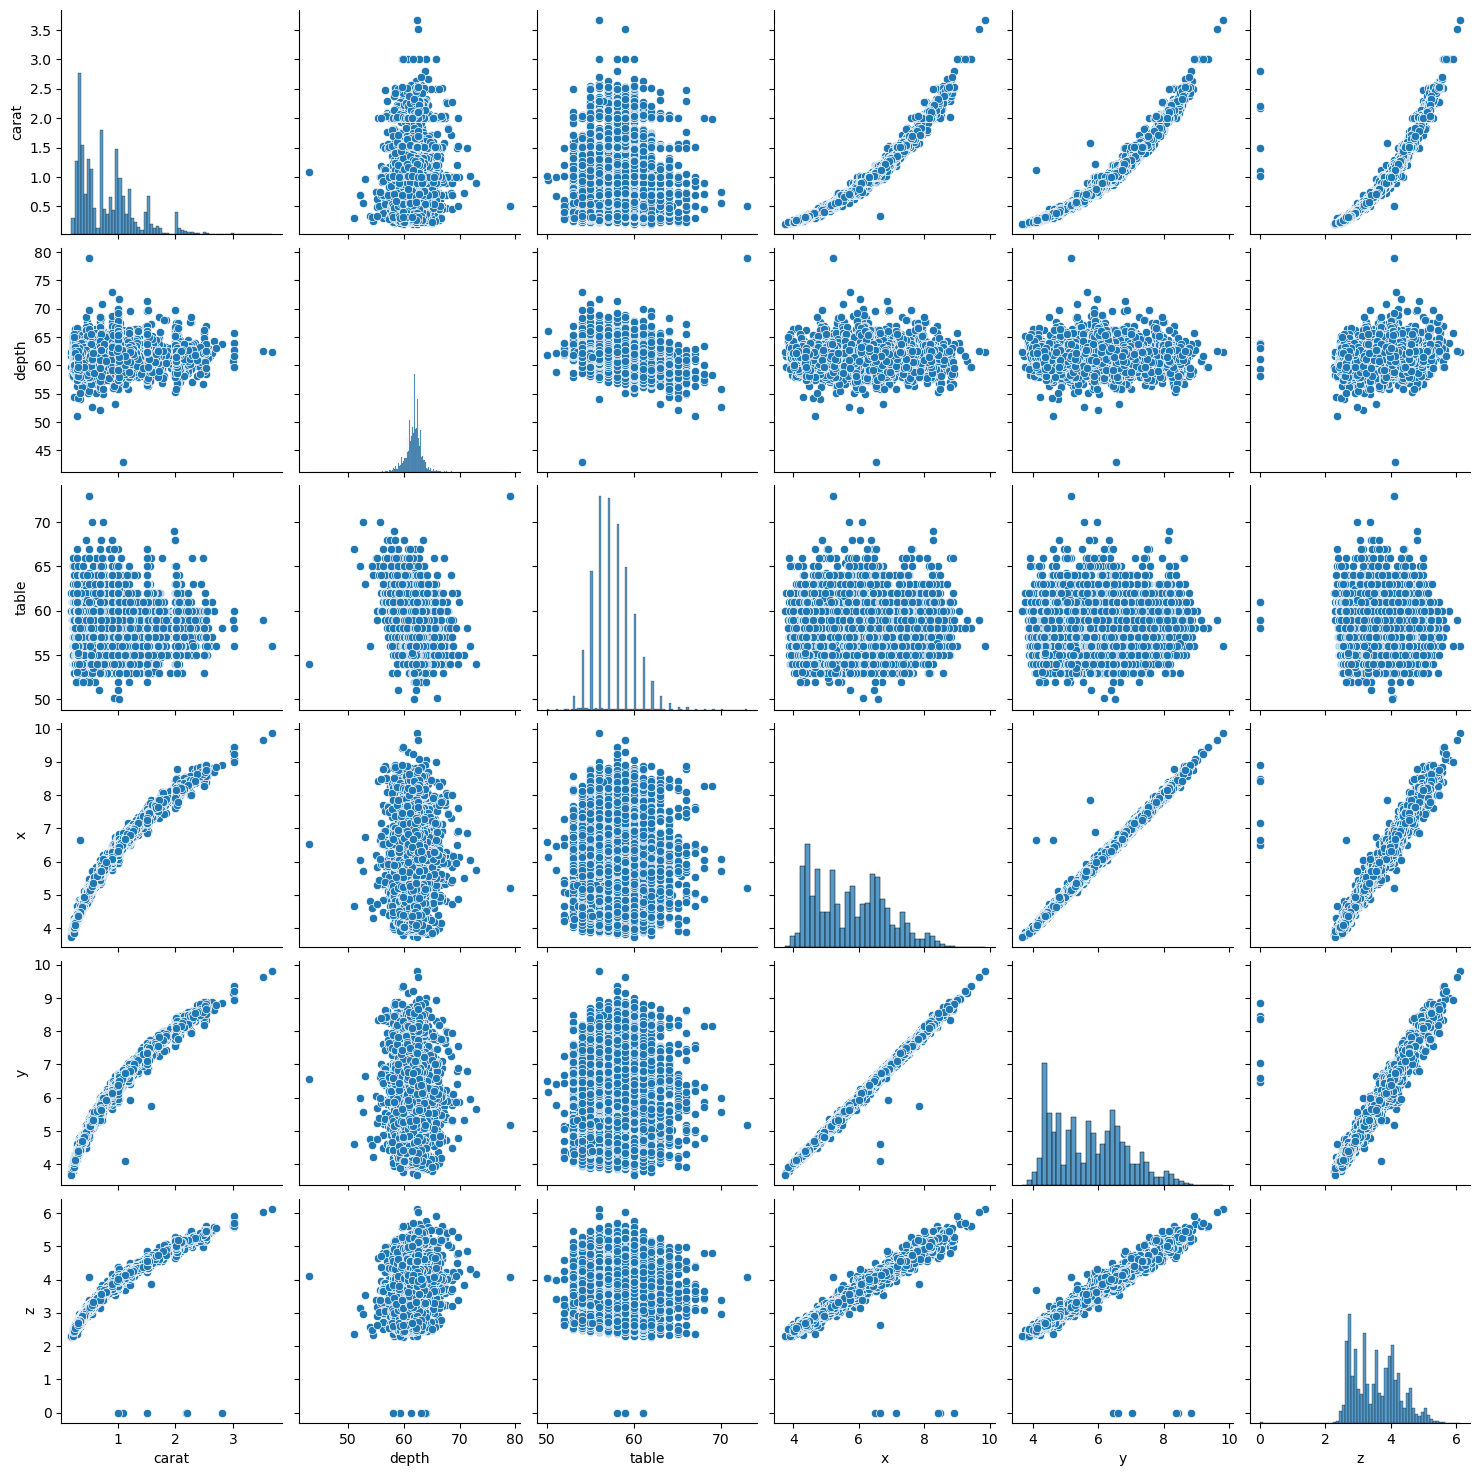

In [176]:
sns.pairplot(df_test)

In [182]:
df_test.loc[df_test['x'] <= 0, 'x'] = np.nan
df_test.loc[df_test['y'] <= 0, 'y'] = np.nan
df_test.loc[df_test['z'] <= 0, 'z'] = np.nan

In [184]:
df_test.loc[df_test['x'] > 20, 'x'] /= 10
df_test.loc[df_test['y'] > 20, 'y'] /= 10
df_test.loc[df_test['z'] > 20, 'z'] /= 10

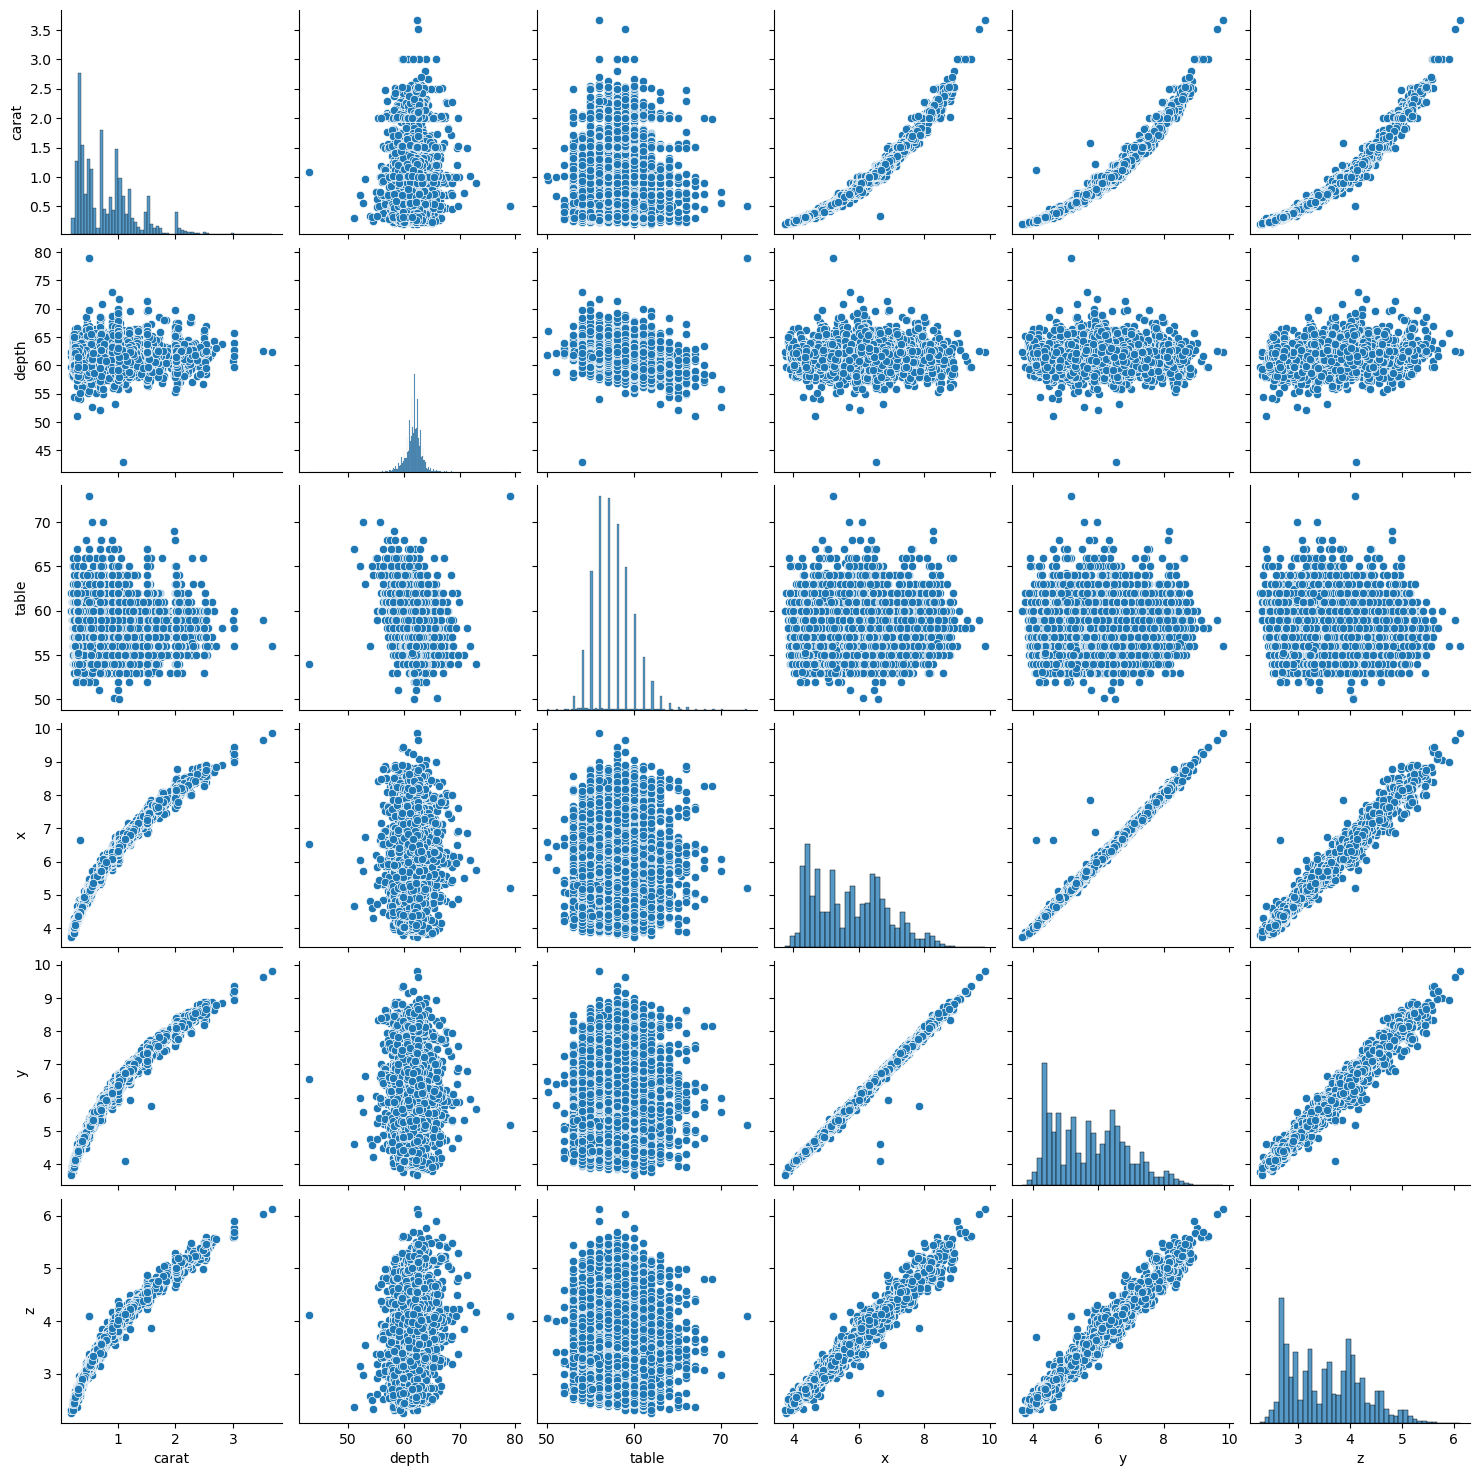

In [186]:
sns.pairplot(df_test)

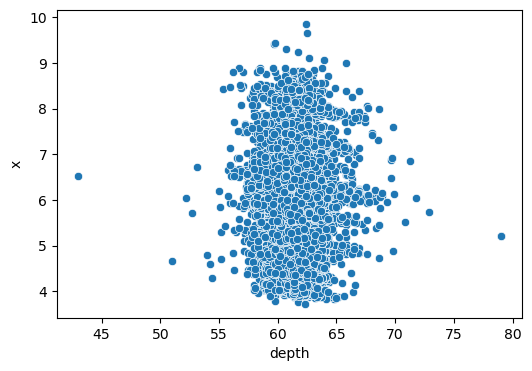

In [200]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='depth', y='x', data=df_test)
plt.show()

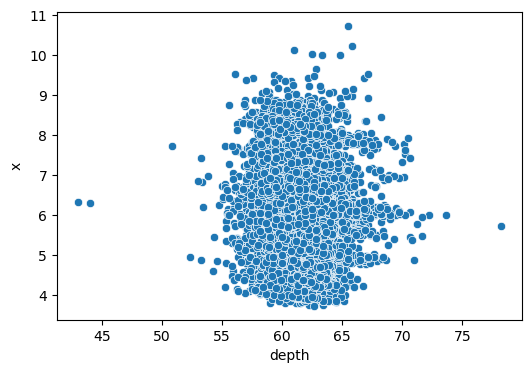

In [264]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='depth', y='x', data=df)
plt.show()

In [204]:
df_test[((df_test['depth'] < 50) | (df_test['depth'] > 75)) & ((df_test['x'] > 5) | (df_test['x'] < 7))]

carat    cut color clarity  depth  table     x     y     z
2781   0.50   Fair     E     VS2   79.0   73.0  5.21  5.18  4.09
4998   0.50   Fair     E     VS2   79.0   73.0  5.21  5.18  4.09
8113   1.09  Ideal     J     VS2   43.0   54.0  6.53  6.55  4.12

In [275]:
df[((df['depth'] < 50) | (df['depth'] > 75)) & ((df['x'] > 5) | (df['x'] < 7))]

carat   cut color clarity  depth  table  price     x     y     z
3611    1.03  Fair     E      I1   78.2   54.0   1262  5.72  5.59  4.42
12616   1.00  Fair     G     VS2   44.0   53.0   4032  6.31  6.24  4.12
37412   1.00  Fair     G     SI1   43.0   59.0   3634  6.32  6.27  3.97

In [218]:
# 79 никак не получается 
# для камня 8113 слишком низкая depth 

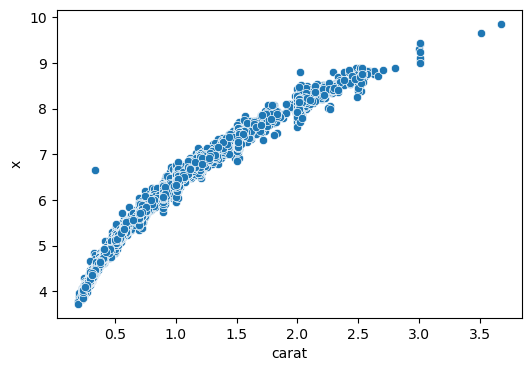

In [208]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='carat', y='x', data=df_test)
plt.show()

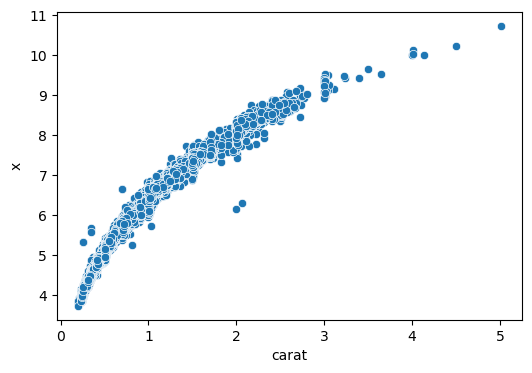

In [266]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='carat', y='x', data=df)
plt.show()

In [231]:
df_test[((df_test['carat'] < 0.5) & (df_test['carat'] > 0)) & ((df_test['x'] > 6) & (df_test['x'] < 7))]
# У этого камня каратность должна быть выше

carat   cut color clarity  depth  table     x     y     z
5177   0.34  Good     E     VS2   57.0   61.0  6.65  4.61  2.64

In [268]:
df[((df['carat'] < 0.5) & (df['carat'] > 0)) & ((df['x'] > 6) & (df['x'] < 7))]


Empty DataFrame
Columns: [carat, cut, color, clarity, depth, table, price, x, y, z]
Index: []

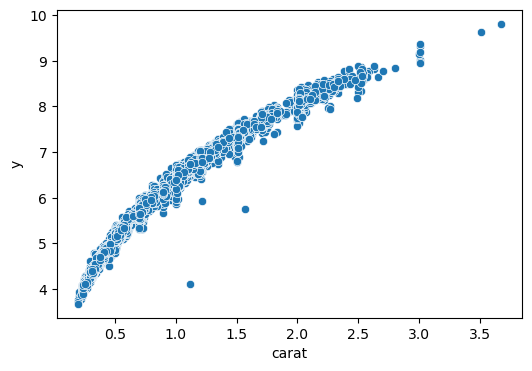

In [210]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='carat', y='y', data=df_test)
plt.show()

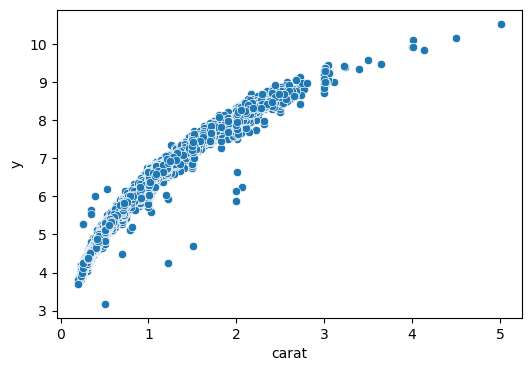

In [272]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='carat', y='y', data=df)
plt.show()

In [247]:
df_test[((df_test['carat'] < 1.4) & (df_test['carat'] > 1)) & ((df_test['y'] > 4) & (df_test['y'] < 4.5))]
# карат должен быть меньше , ближе к 0.5

carat      cut color clarity  depth  table     x     y    z
643   1.12  Premium     H     VS1   61.6   58.0  6.64  4.11  3.7

In [270]:
df[((df['carat'] < 1.4) & (df['carat'] > 1)) & ((df['y'] > 4) & (df['y'] < 4.5))]

carat      cut color clarity  depth  table  price     x     y     z
16267   1.22  Premium     J     SI2   62.6   59.0   3156  6.79  4.24  3.76

In [277]:
# Глубину заменим просто на корректную формулу

In [279]:
# чтобы другие камни обработать НУЖНО УЧИТЫВАТЬ ЕЩЕ И ЦЕНУ ЧТОБЫ ГРАМОТНО МЕНЯТЬ РАЗМЕРНОСТИ

In [281]:
df['depth'] = round(2 * df['z'] / (df['x'] + df['y']) * 100, 1)

In [283]:
df_test['depth'] = round(2 * df_test['z'] / (df_test['x'] + df_test['y']) * 100, 1)

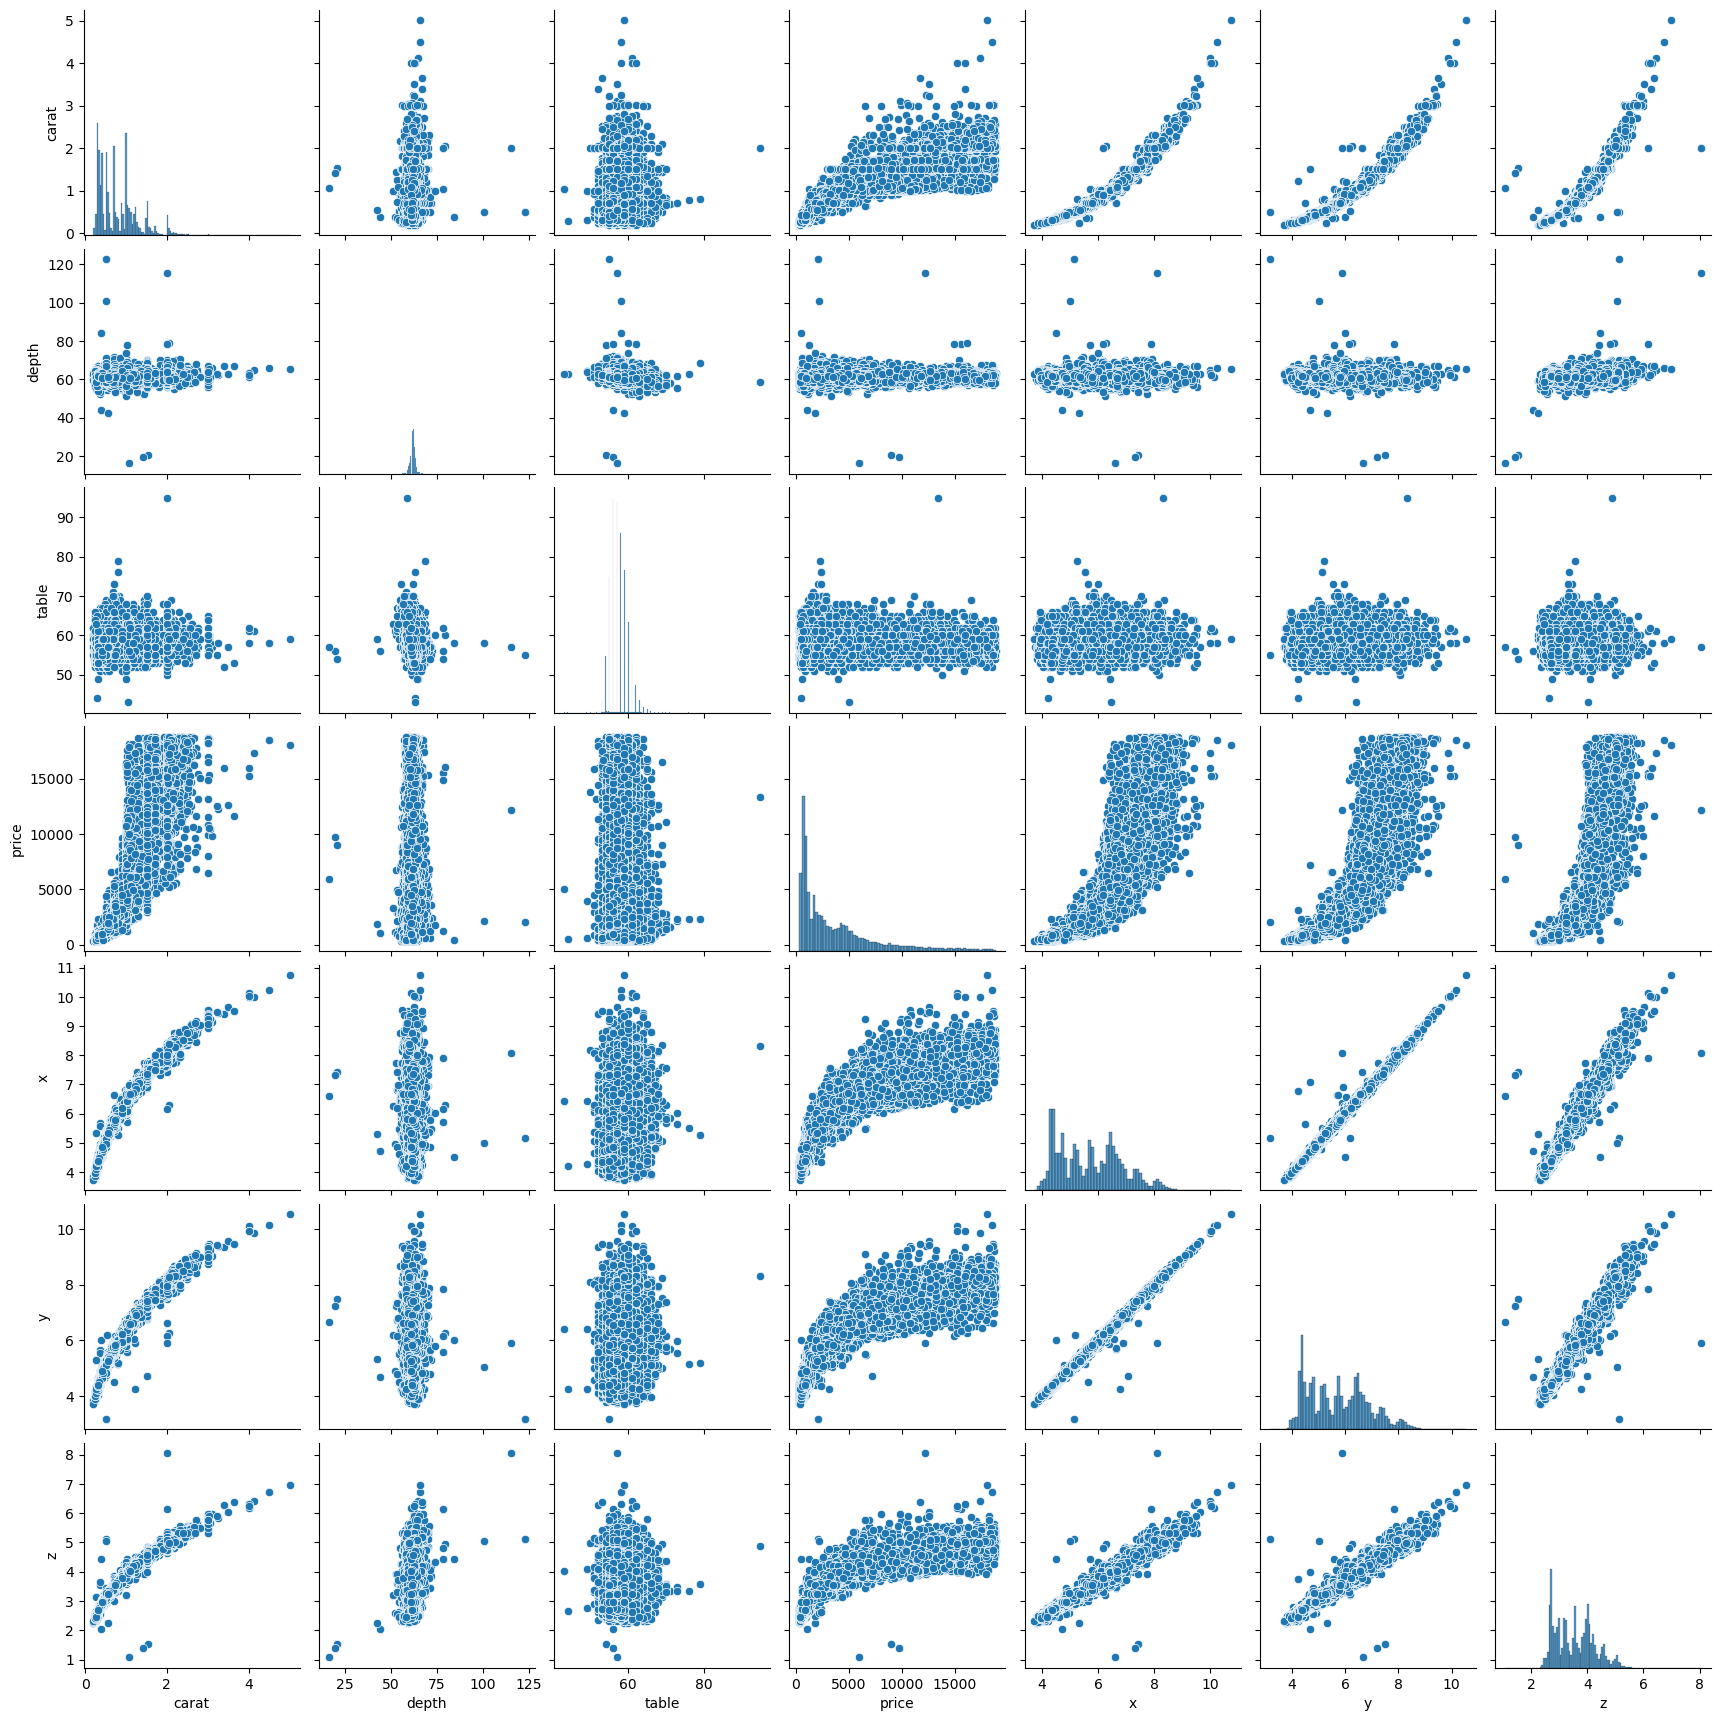

In [285]:
sns.pairplot(df)

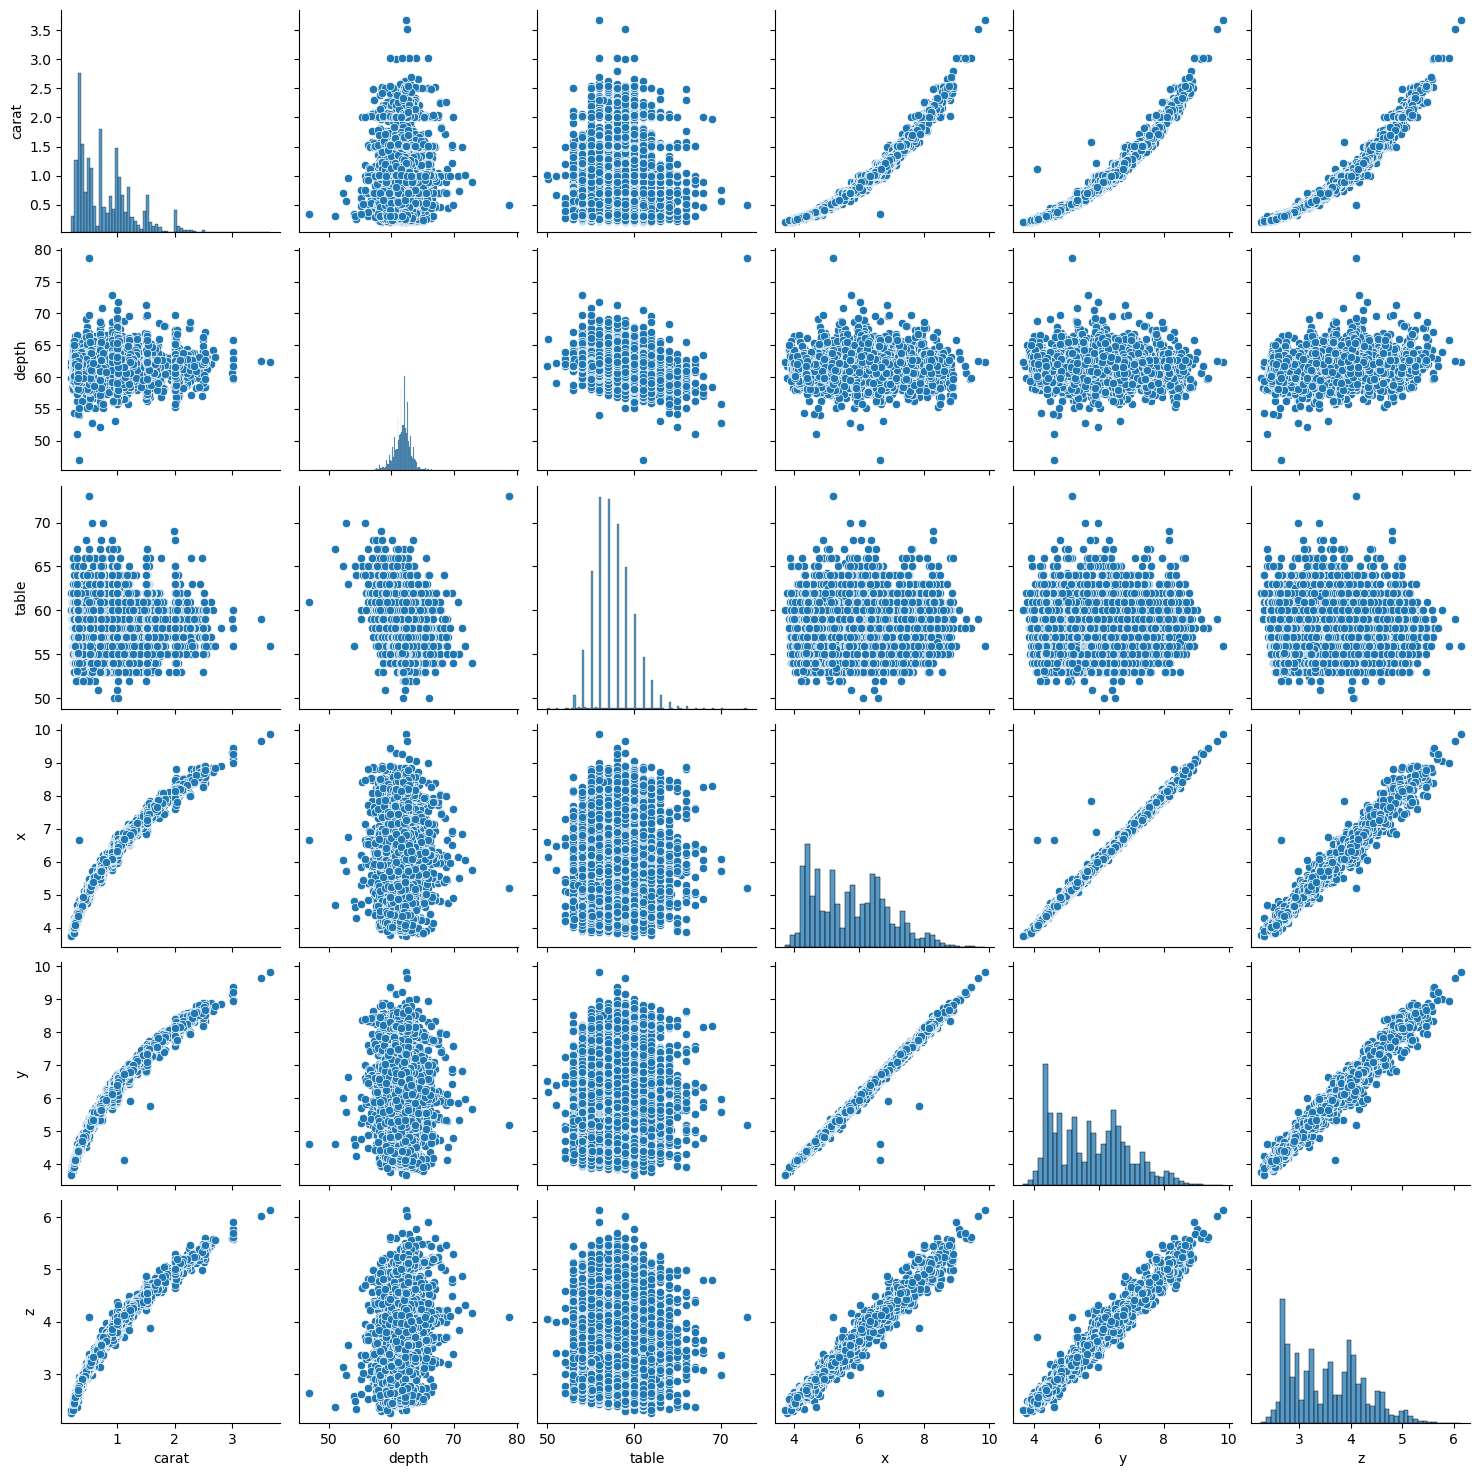

In [286]:
sns.pairplot(df_test)

In [8]:
# df = pd.read_csv('test.csv')

In [10]:
# df.loc[df['x'] <= 0, 'x'] = np.nan
# df.loc[df['y'] <= 0, 'y'] = np.nan
# df.loc[df['z'] <= 0, 'z'] = np.nan
# df.loc[df['carat'] <= 0, 'carat'] = np.nan
# df.loc[df['depth'] <= 0, 'depth'] = np.nan
# df.loc[df['table'] <= 0, 'table'] = np.nan

# df.loc[df['x'] > 20, 'x'] /= 10
# df.loc[df['y'] > 20, 'y'] /= 10
# df.loc[df['z'] > 20, 'z'] /= 10

# df['depth'] = round(2 * df['z'] / (df['x'] + df['y']) * 100, 1)

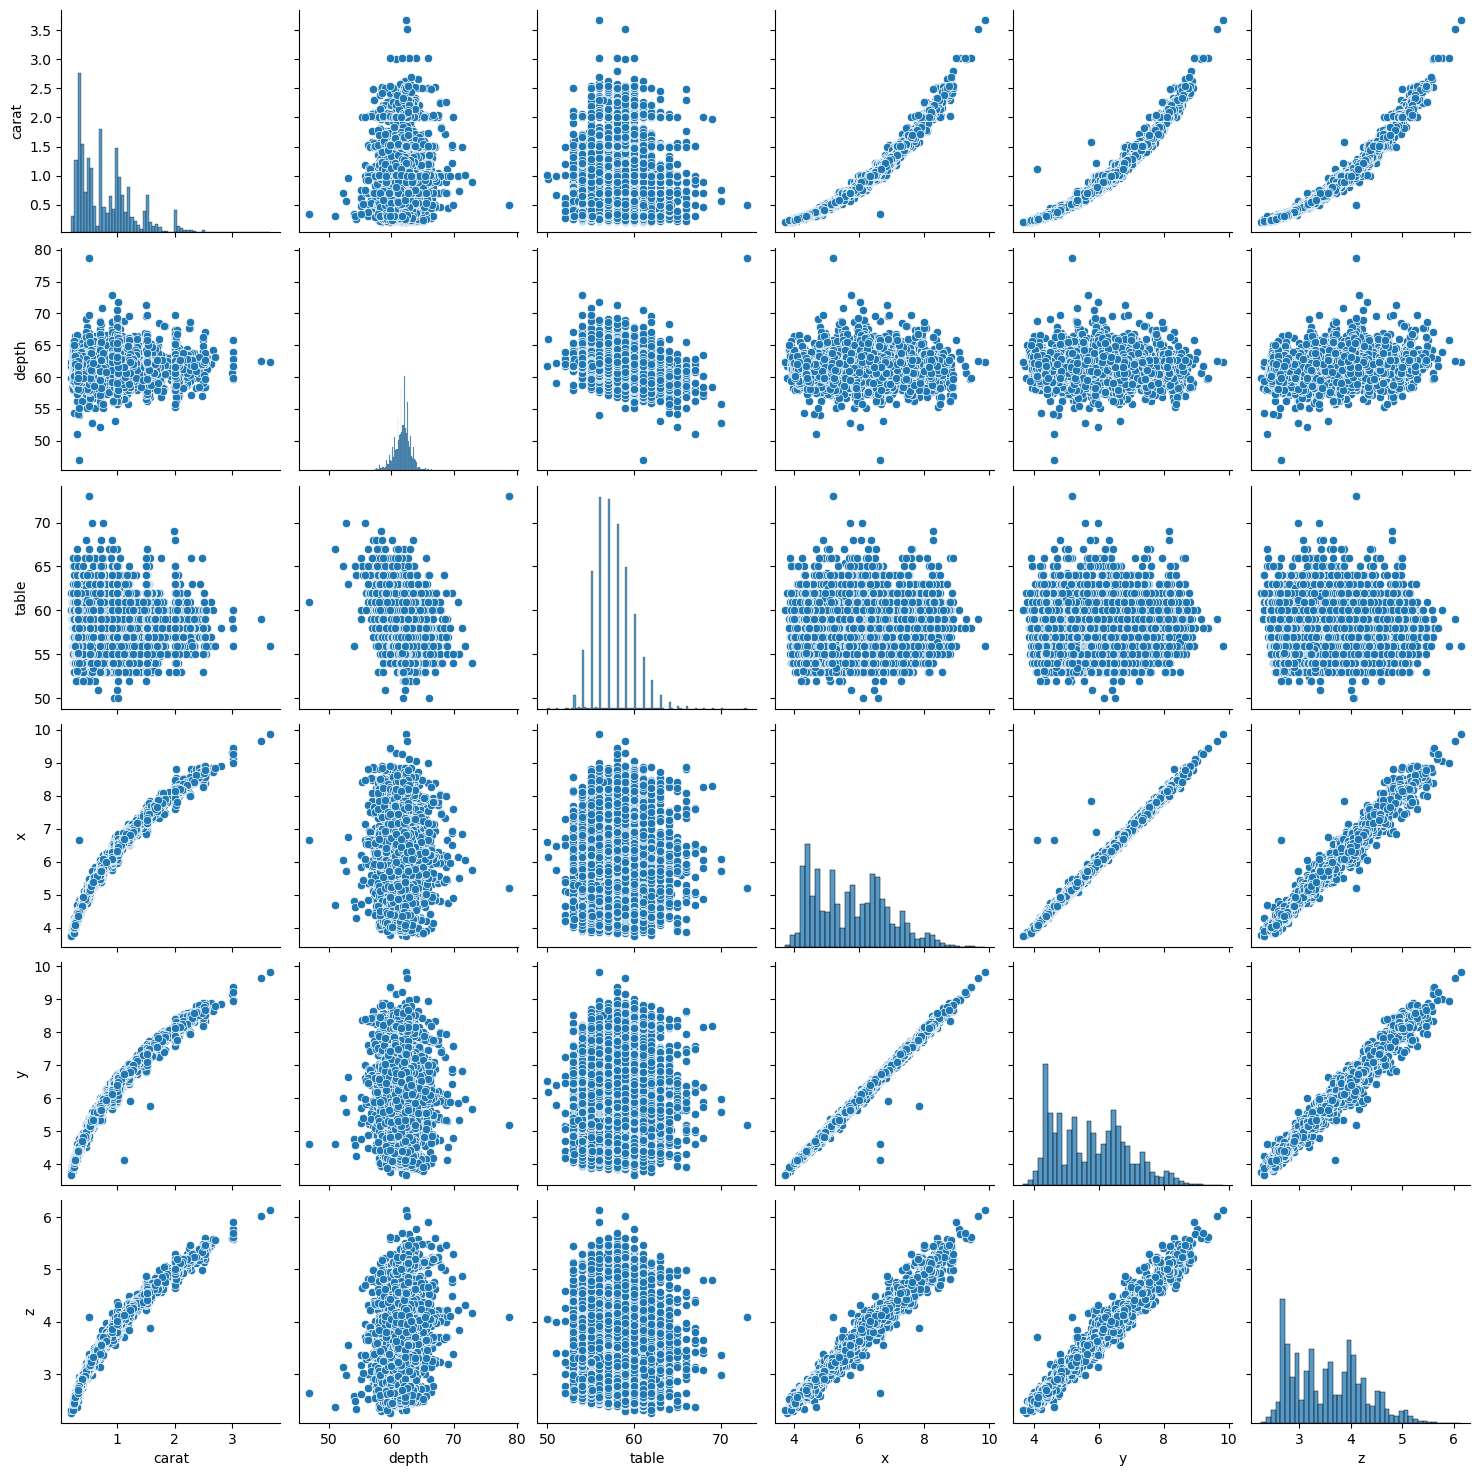

In [12]:
# sns.pairplot(df)